In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

In [24]:
# Read data
data = pd.read_csv('../data/mall_customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
# Encode the Genre column
encoder = LabelEncoder()
data["Genre"] = encoder.fit_transform(data["Genre"])

In [9]:
# Select columns for clustering
features = ["Genre", "Age", "Annual Income (k$)", "Spending Score (1-100)"]
cluster_features = data[features]

In [10]:
cluster_features

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


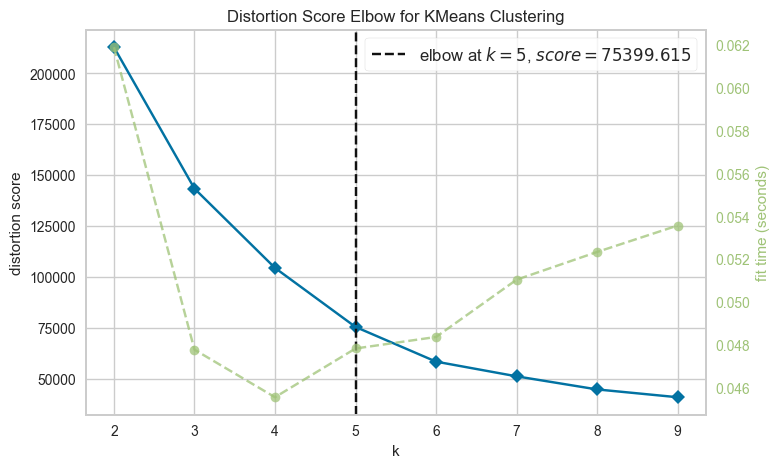

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Find the optimal number of clusters using the Elbow method
fig, ax = plt.subplots(figsize=(8, 5))
elbow_visualizer = KElbowVisualizer(KMeans(n_init=10, random_state=42), k=(2, 10), ax=ax)
elbow_visualizer.fit(cluster_features)
elbow_visualizer.show()

In [13]:
# Get the optimal number of clusters
best_k = elbow_visualizer.elbow_value_ if elbow_visualizer.elbow_value_ else 4
print(f"Optimal number of clusters: {best_k}")

Optimal number of clusters: 5


In [14]:
# Apply K-Means with the optimal number of clusters
kmeans_model = KMeans(n_clusters=best_k, random_state=42, n_init=10)
data["Cluster_Label"] = kmeans_model.fit_predict(cluster_features)

In [15]:
# Evaluate the clustering model
silhouette_avg = silhouette_score(cluster_features, data["Cluster_Label"])
davies_bouldin = davies_bouldin_score(cluster_features, data["Cluster_Label"])
calinski_harabasz = calinski_harabasz_score(cluster_features, data["Cluster_Label"])

print("\n**K-Means Model Evaluation**:")
print(f"    Silhouette Score: {silhouette_avg:.3f} (Higher is better)")
print(f"    Davies-Bouldin Score: {davies_bouldin:.3f} (Lower is better)")
print(f"    Calinski-Harabasz Score: {calinski_harabasz:.3f} (Higher is better)")


**K-Means Model Evaluation**:
    Silhouette Score: 0.444 (Higher is better)
    Davies-Bouldin Score: 0.822 (Lower is better)
    Calinski-Harabasz Score: 150.946 (Higher is better)


C:\Users\thanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


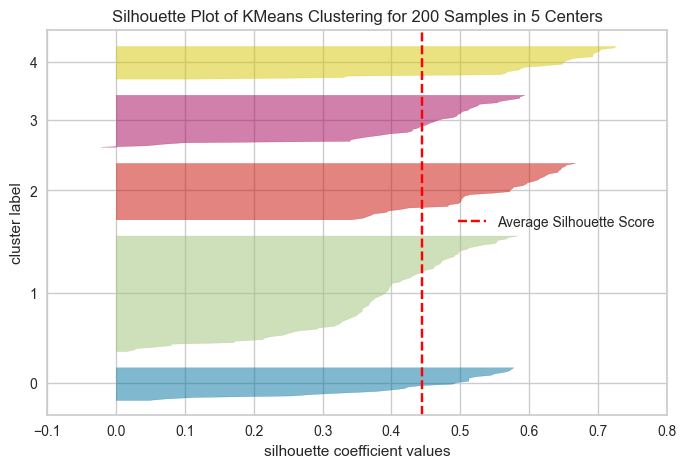

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:
# Visualize Silhouette Score
fig, ax = plt.subplots(figsize=(8, 5))
silhouette_visualizer = SilhouetteVisualizer(kmeans_model, ax=ax, colors='yellowbrick')
silhouette_visualizer.fit(cluster_features)
silhouette_visualizer.show()

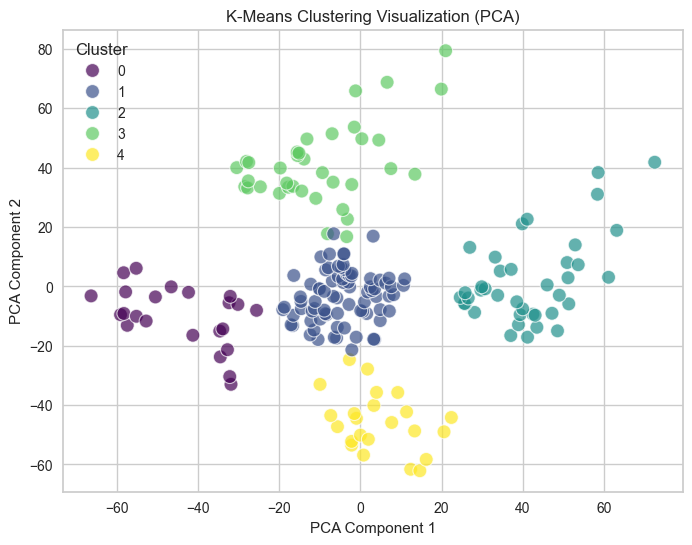

In [17]:
# Reduce dimensions using PCA to visualize clustering
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(cluster_features)

# Visual chart with PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_transformed[:, 0],
    y=pca_transformed[:, 1],
    hue=data["Cluster_Label"],
    palette="viridis",
    s=100,
    alpha=0.7
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering Visualization (PCA)")
plt.legend(title="Cluster")
plt.show()

In [18]:
# Display data results after clustering
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Label
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,3
197,198,1,32,126,74,2
198,199,1,32,137,18,3


In [23]:
data[["CustomerID", "Cluster_Label"]].to_csv("../data/kmeans_clustering_result.csv", index=False)